In [30]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

(188, 268, 3)


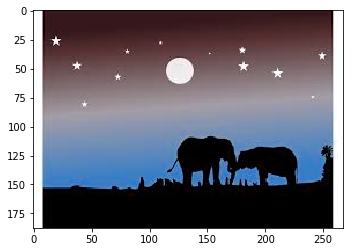

In [12]:
image=cv2.imread('I:/images.jpg') # Read an image into BGR format
print(image.shape)
plt.imshow(image) # shows in RGB format
plt.show()

(188, 268, 3)


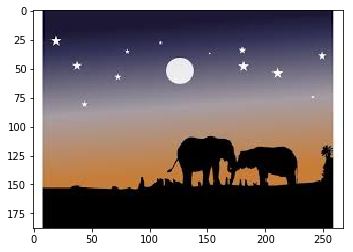

In [46]:
# obtaining origimal image by converting the colour space from BGR to RGB
original_image=cv2.imread('I:/images.jpg')
original_image=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
print(original_image.shape)
plt.imshow(original_image)
original_shape=original_image.shape
plt.show()

In [19]:
# Flatten each channel in to linear array
all_pixel=original_image.reshape(((188*268),3)) # here 3 is the no. of channels , one for red, onr for green and one for blue.
print(all_pixel.shape)

(50384, 3)


In [23]:
from sklearn.cluster import KMeans

In [24]:
dominant_color = 4

In [26]:
km = KMeans(n_clusters=dominant_color)
km.fit(all_pixel)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
centers=km.cluster_centers_
print(centers)

[[164.43251405 136.52673884 122.34892905]
 [ 52.56429501  49.0210615   79.24239871]
 [249.9331723  249.31803543 249.50697799]
 [  2.71385991   0.86065574   1.21460507]]


In [31]:
centers = np.array(centers,dtype='uint8')

In [32]:
print(centers)

[[164 136 122]
 [ 52  49  79]
 [249 249 249]
 [  2   0   1]]


#### Plot , what colour all these

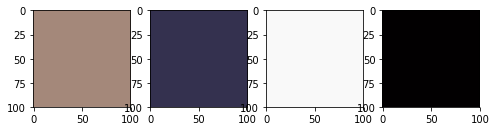

In [67]:
i=1

plt.figure(0,figsize=(8,2))

colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    #plt.axis("OFF")
    i+=1
    colors.append(each_col)
    
    
    # color_swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    
    plt.imshow(a)
    
plt.show()

# Segmenting our original image

In [80]:
new_image = np.zeros(((188//4)*(268*4),3),dtype='uint8')

print(new_image.shape)


(50384, 3)


In [81]:
#print(colors)
colors

[array([164, 136, 122], dtype=uint8),
 array([52, 49, 79], dtype=uint8),
 array([249, 249, 249], dtype=uint8),
 array([2, 0, 1], dtype=uint8)]

In [82]:
km.labels_


array([2, 2, 2, ..., 2, 2, 2])

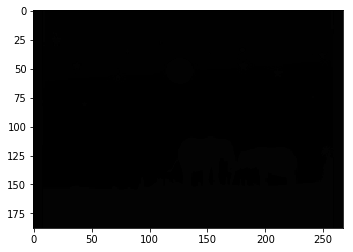

In [83]:
for ix in range(new_image.shape[0]):
    new_image[ix] = km.labels_[ix]
    
new_image = new_image.reshape((original_shape))
plt.imshow(new_image)
plt.show()